In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Logistic Regression , KNN , SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
### Information about features rows,memory usage and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11738 entries, 0 to 11737
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            11738 non-null  object 
 1   no_of_adults                          11738 non-null  int64  
 2   no_of_children                        11738 non-null  int64  
 3   no_of_weekend_nights                  11738 non-null  int64  
 4   no_of_week_nights                     11738 non-null  int64  
 5   type_of_meal_plan                     11738 non-null  object 
 6   required_car_parking_space            11738 non-null  int64  
 7   room_type_reserved                    11738 non-null  object 
 8   lead_time                             11738 non-null  int64  
 9   arrival_year                          11738 non-null  int64  
 10  arrival_month                         11738 non-null  int64  
 11  arrival_date   

In [4]:
### Shape of the dataset having 32 columns and 569 rows
df.shape

(36275, 19)

In [4]:
### Statistical analysis of all columns containing mean , median , etc.
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,11738,11738.000000,11738.000000,11738.000000,11738.000000,11738,11738.000000,11738,11738.000000,11738.000000,11738.000000,11738.000000,11738,11738.000000,11737.000000,11737.000000,11737.000000,11737.000000,11737
unique,11738,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,8956,NaN,9066,NaN,NaN,NaN,NaN,8148,NaN,NaN,NaN,NaN,NaN,7927
mean,NaN,1.853041,0.106236,0.810445,2.204975,NaN,0.032799,NaN,85.300136,2017.823905,7.405095,15.562021,NaN,0.025388,0.019852,0.146801,103.769830,0.640709,NaN
std,NaN,0.515211,0.418996,0.871932,1.419650,NaN,0.178119,NaN,86.153728,0.380917,3.056437,8.723598,NaN,0.157306,0.311172,1.643657,35.061784,0.794487,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.750000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,15.000000,NaN,0.000000,0.000000,0.000000,100.000000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.600000,1.000000,NaN


In [15]:
# drop useless columns
df.drop(['Booking_ID'], axis=1, inplace=True)
df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [ ]:
df.groupby(by='booking_status').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,,,
Canceled,1.909550,0.124358,0.887505,2.392259,0.009592,139.215482,2017.919142,7.374253,15.730080,0.001346,0.005553,0.002188,110.589966,0.334623
Not_Canceled,1.813489,0.095982,0.773309,2.112710,0.041410,58.927224,2017.772325,7.447724,15.532144,0.037474,0.032021,0.227101,99.931412,0.758549


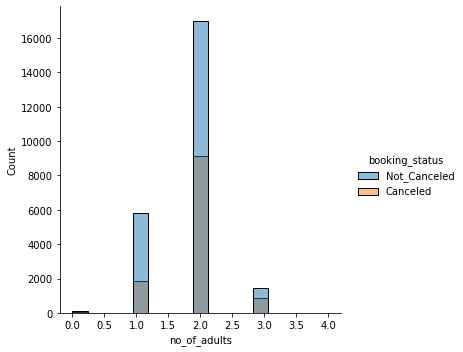

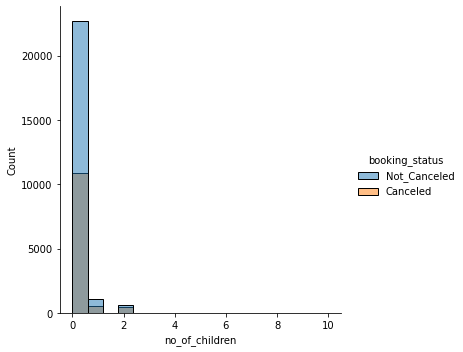

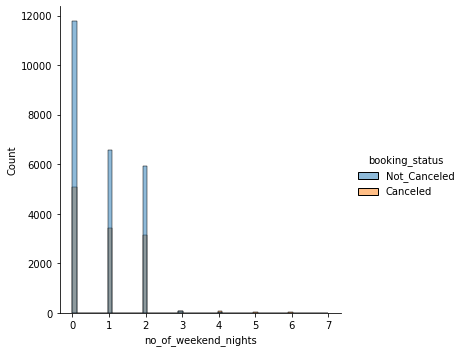

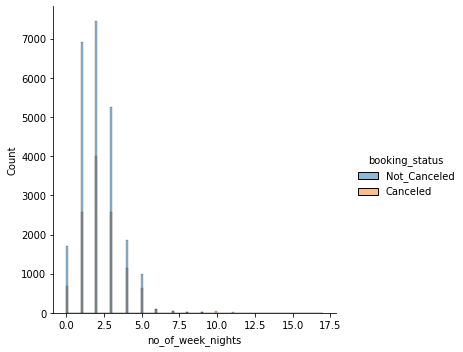

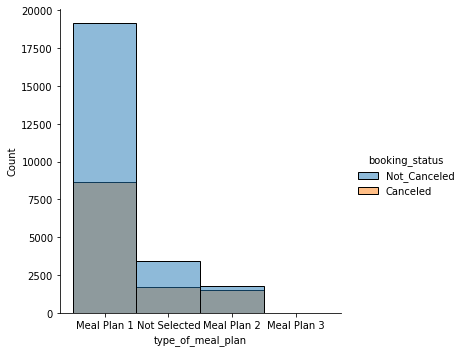

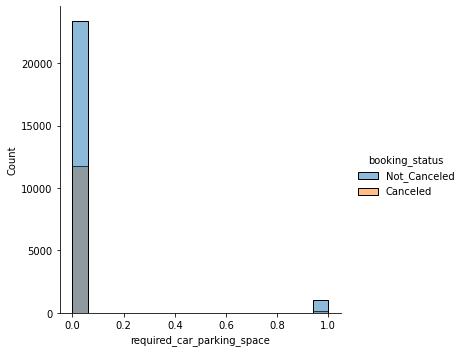

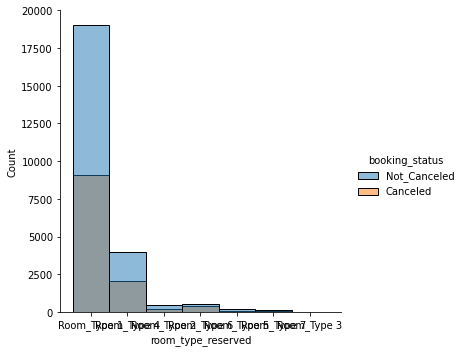

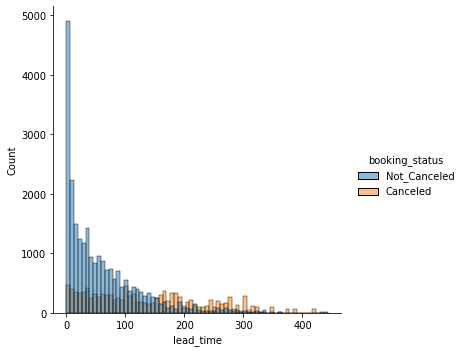

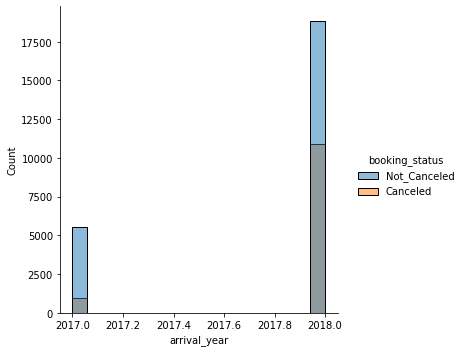

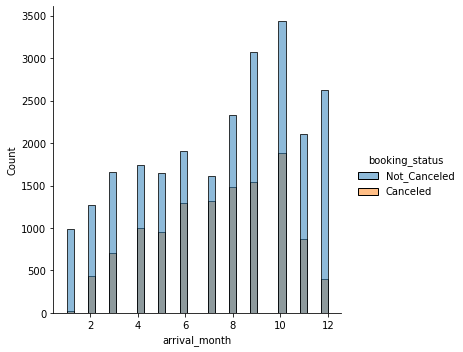

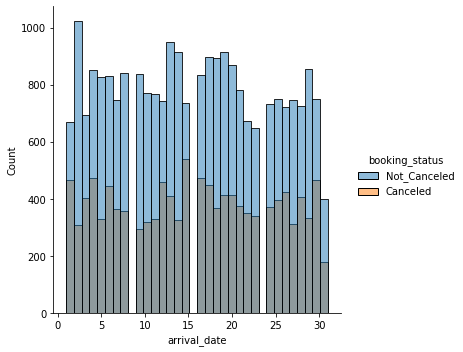

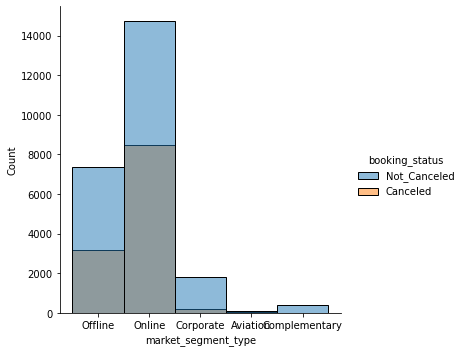

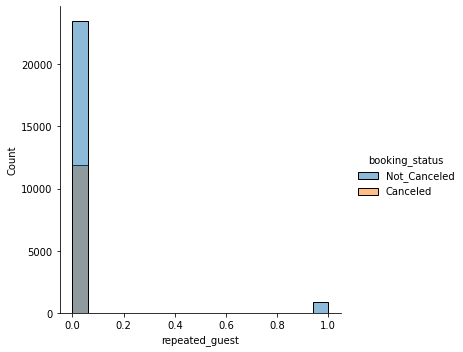

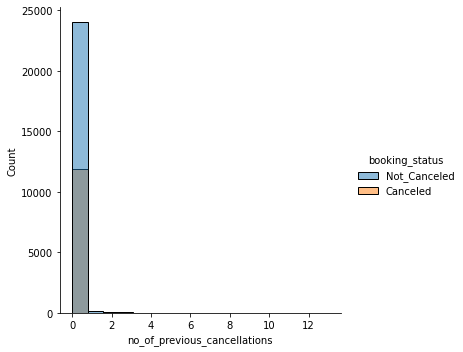

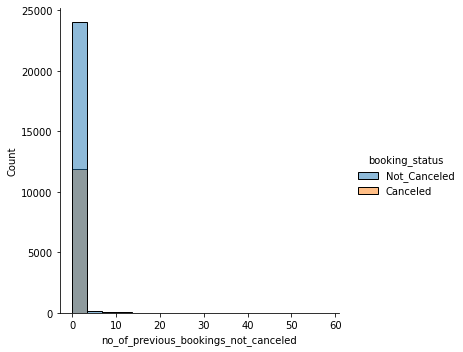

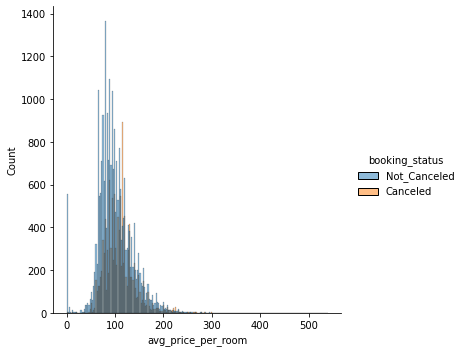

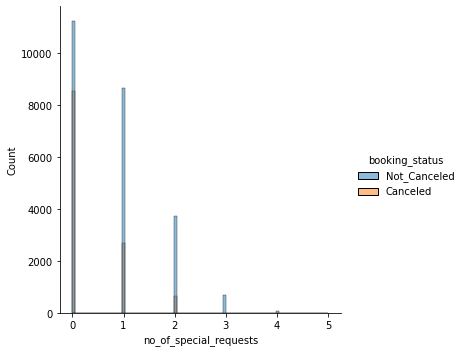

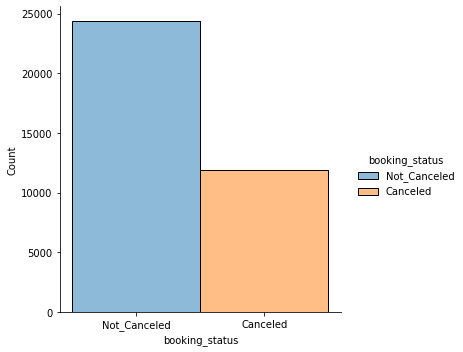

In [ ]:
plt.rcParams['figure.max_open_warning'] = 31

for i in range(len(df.columns)):
  sns.displot(df,x=df.columns[i],hue='booking_status')

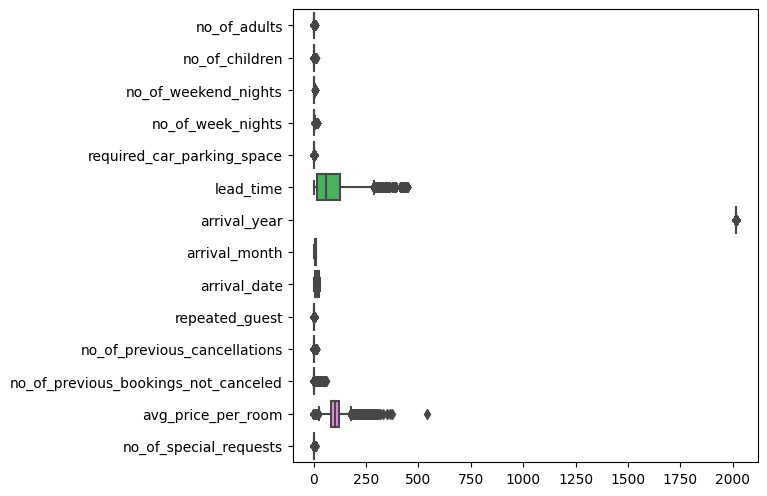

In [ ]:
### Boxplot checking outliers
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

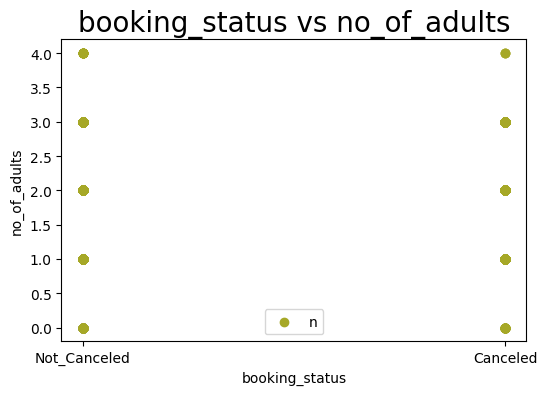

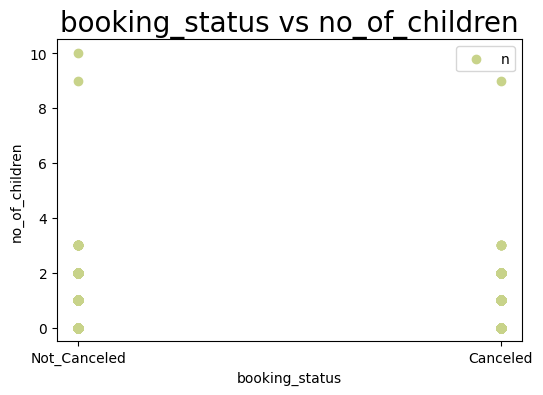

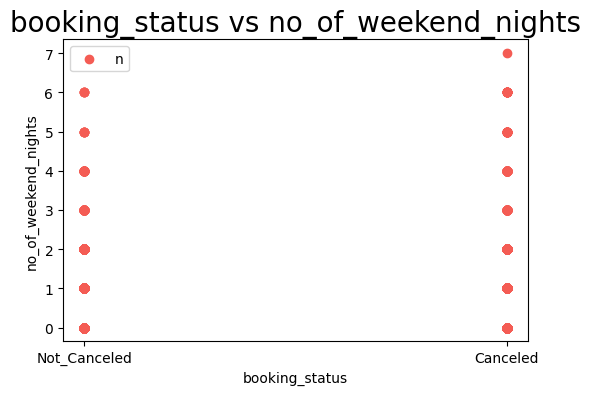

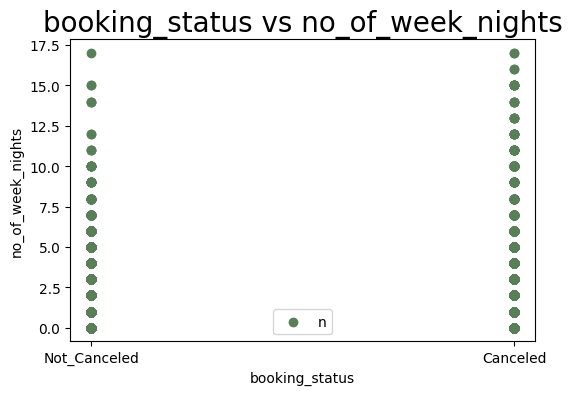

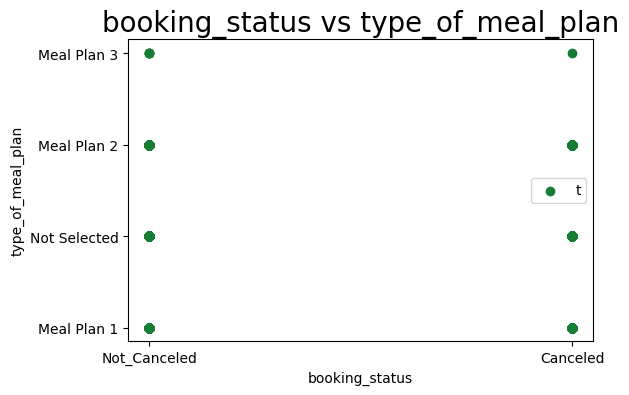

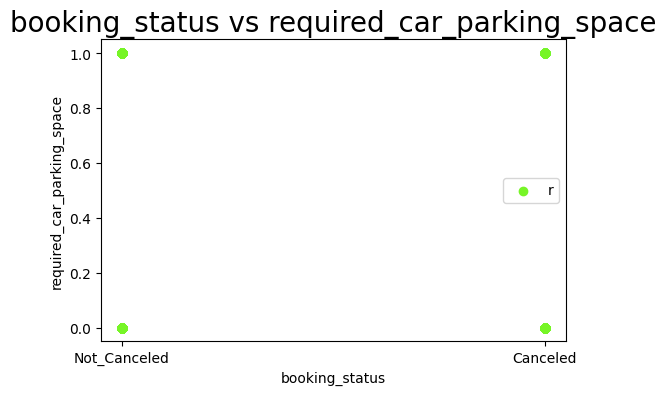

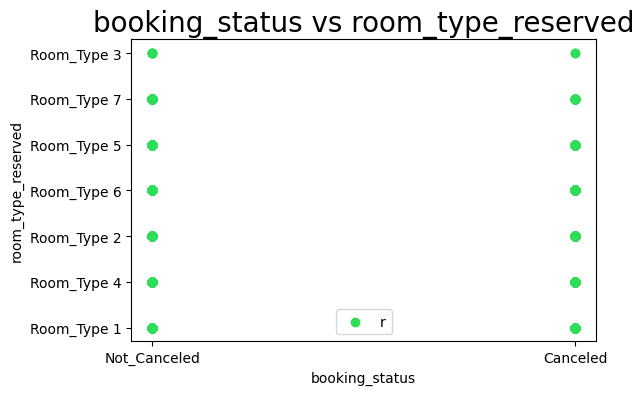

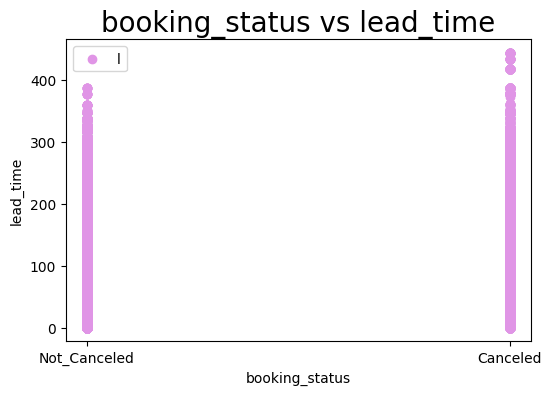

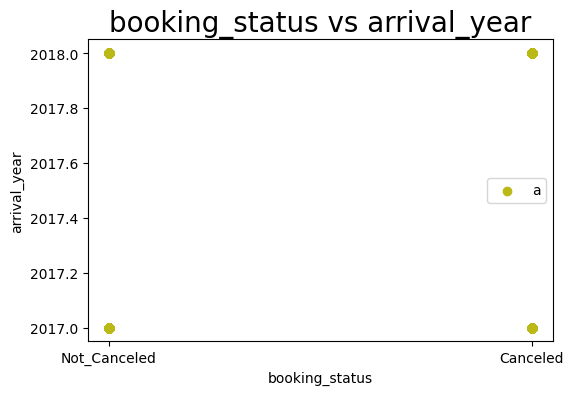

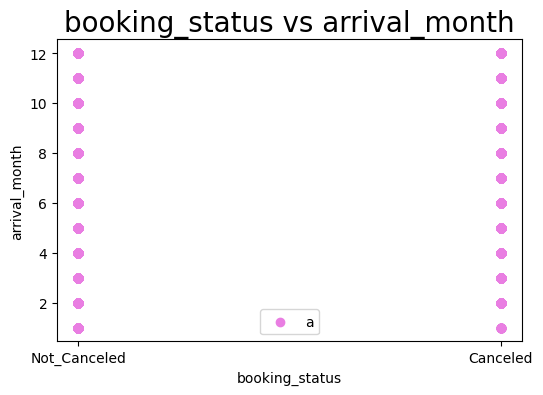

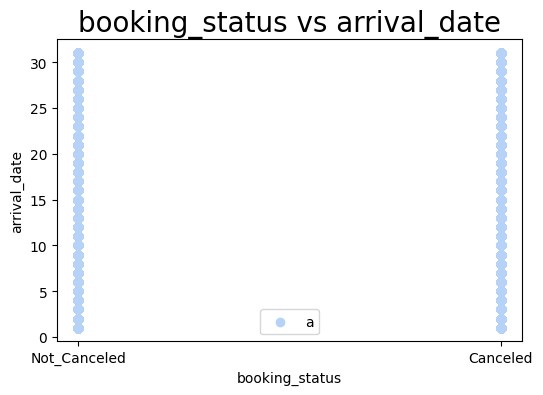

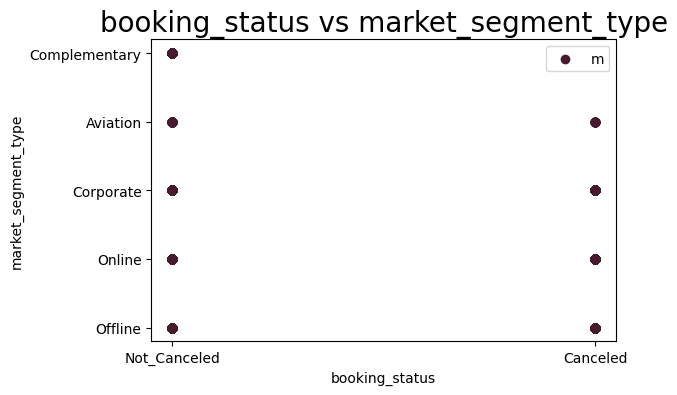

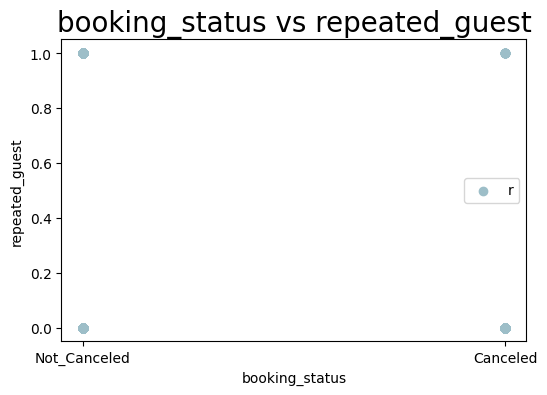

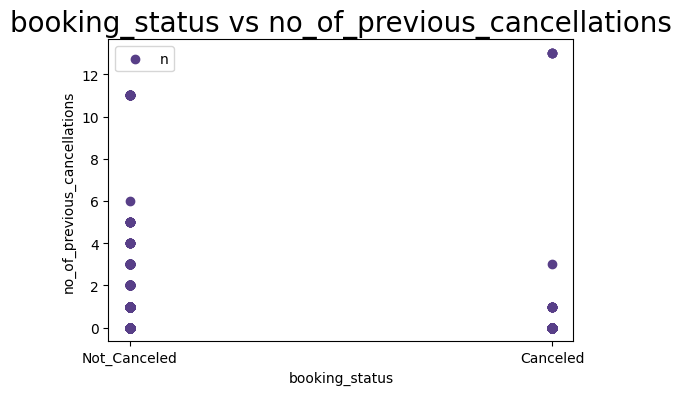

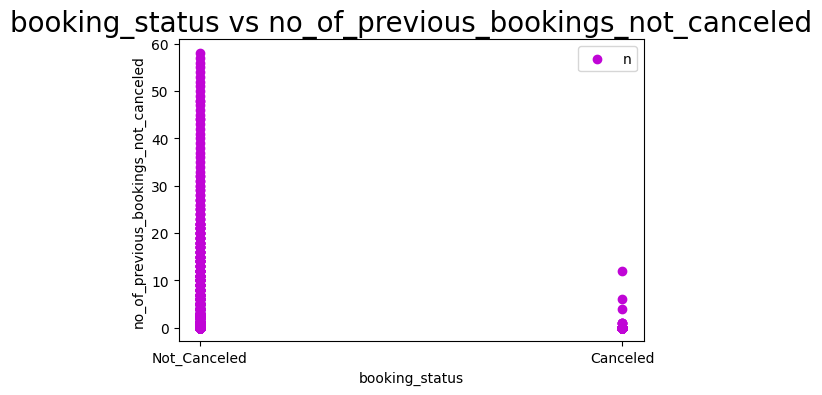

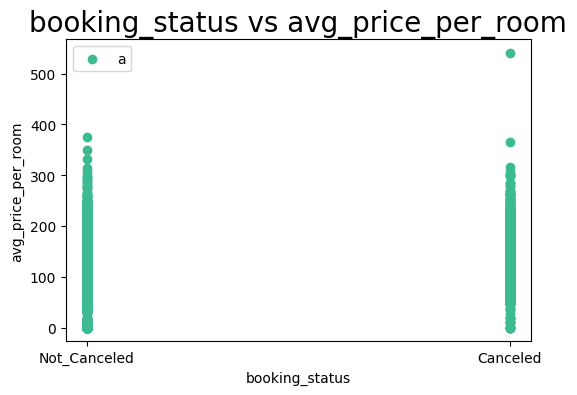

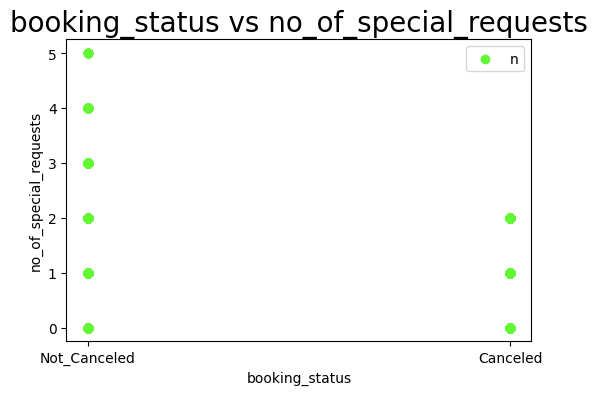

In [ ]:
# ### Bivariate Analysis

# In[18]:


x_col = 'booking_status'
y_cols = list(df.drop('booking_status',axis=1).columns)

for col in y_cols:
    figure = plt.figure(dpi=100)
    ax = plt.gca()
    rgb = np.random.rand(3,)
    ax.scatter(df[x_col], df[col],c=[rgb])
    ax.set_xlabel(x_col)
    ax.set_ylabel(col)
    ax.set_title("{} vs {}".format(x_col,col),fontdict={'fontsize':20})

    plt.legend(labels=col)
    plt.show()

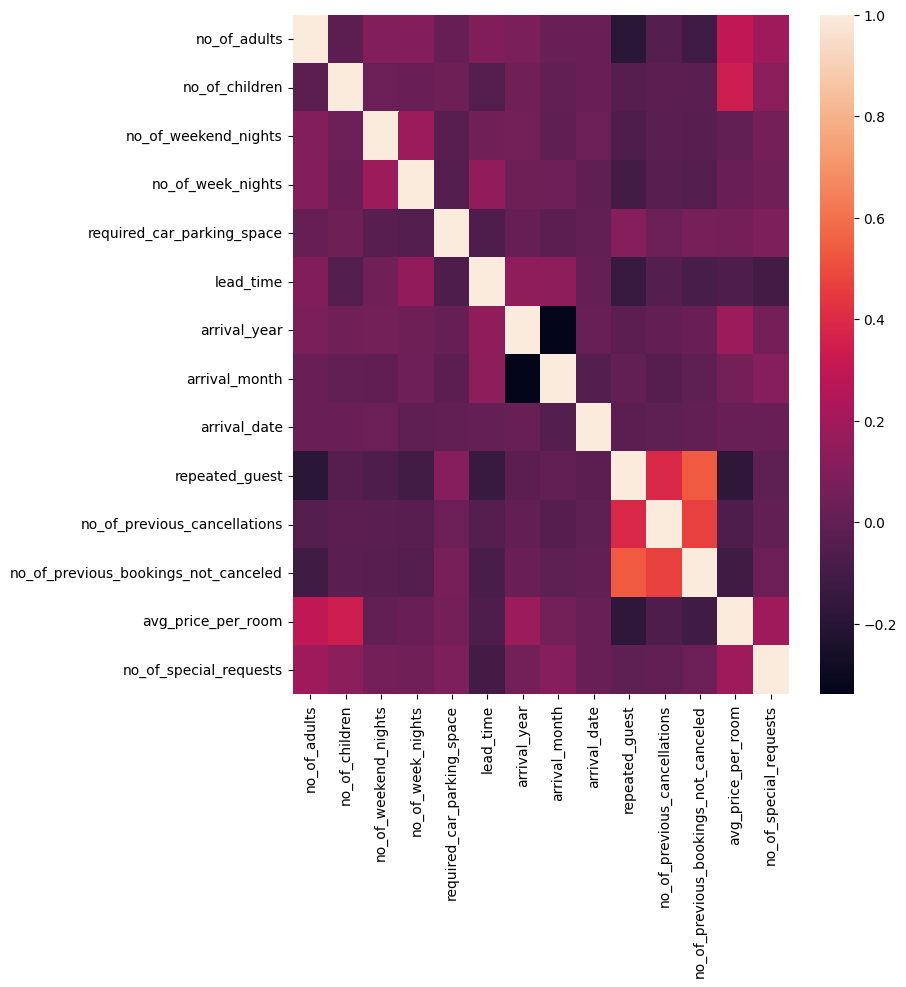

In [ ]:
# ## Multivariate Analysis
# - Correlation Heatmap

# In[19]:


plt.figure(figsize=(8,9),dpi=100)
sns.heatmap(df.corr())

In [ ]:
# ## **Handling Missing Values**

# In[20]:


### Checking missing values for all columns
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
print(df['booking_status'].value_counts())
print(df['type_of_meal_plan'].value_counts())
print(df['room_type_reserved'].value_counts())
print(df['market_segment_type'].value_counts())

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


In [16]:
### Mapping target column to 0 and 1
df['booking_status'] = df['booking_status'].map({'Not_Canceled':0,'Canceled':1})
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Meal Plan 1':0,'Meal Plan 2':1,'Meal Plan 3':2,'Not Selected' : 3})
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1':0,'Room_Type 2':1,'Room_Type 3':2,'Room_Type 4':3,'Room_Type 5':4,'Room_Type 6':5,'Room_Type 7':6})
df['market_segment_type'] = df['market_segment_type'].map({'Online':0,'Offline':1,'Corporate':2,'Complementary':3,'Aviation':4})
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,1,0,0,0,65.00,0,0
1,2,0,2,3,3,0,0,5,2018,11,6,0,0,0,0,106.68,1,0
2,1,0,2,1,0,0,0,1,2018,2,28,0,0,0,0,60.00,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,0,0,0,0,100.00,0,1
4,2,0,1,1,3,0,0,48,2018,4,11,0,0,0,0,94.50,0,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


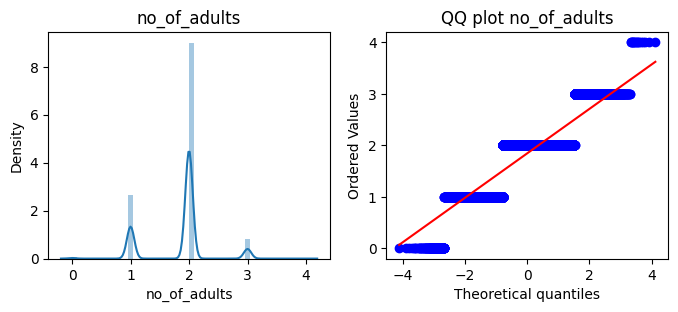

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


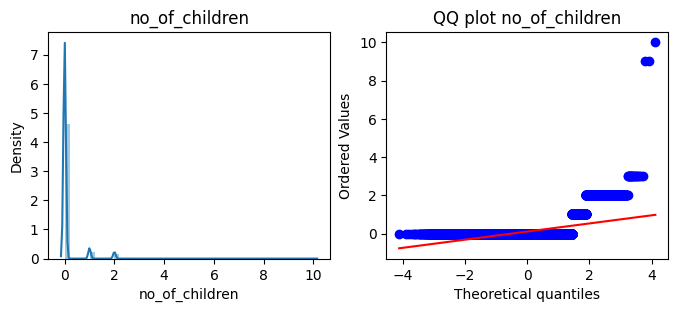

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


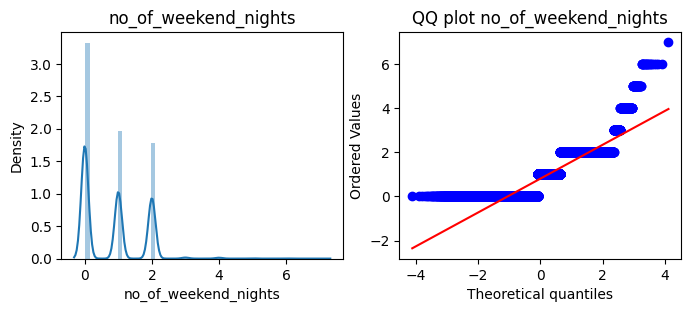

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


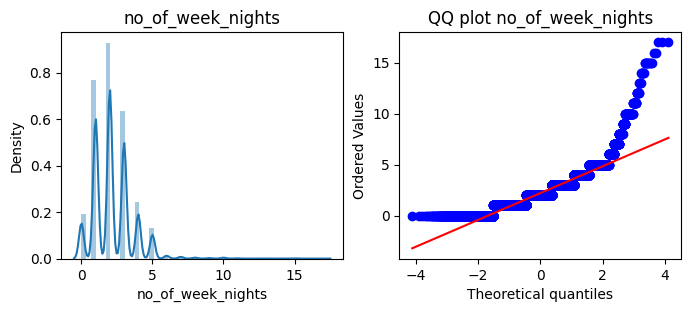

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


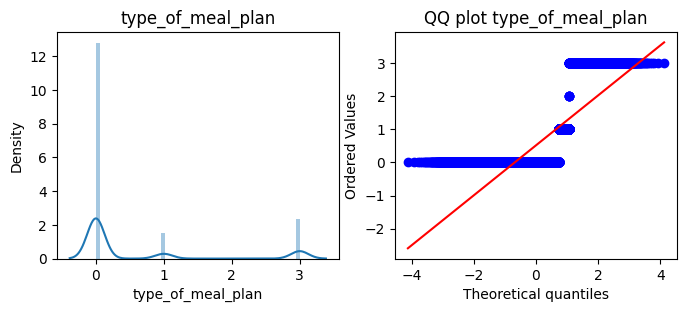

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


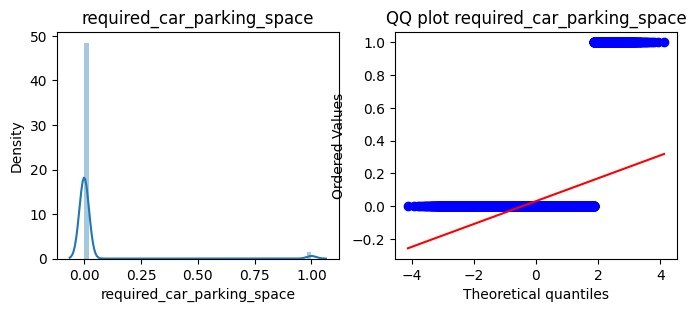

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


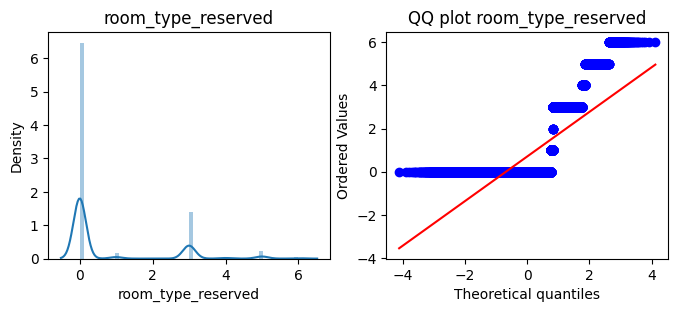

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


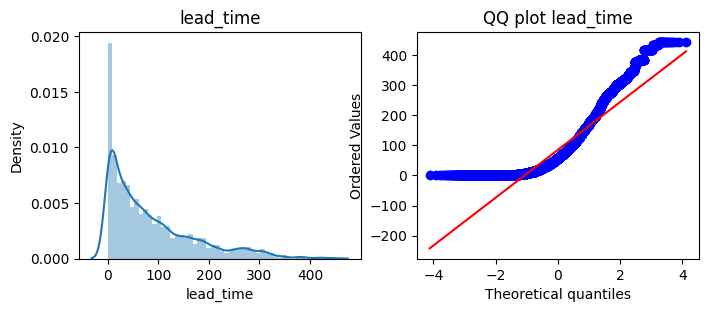

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


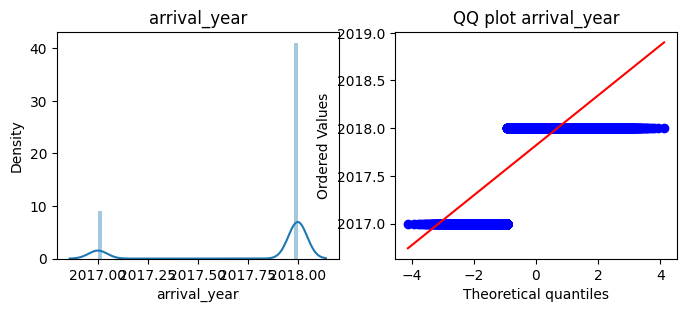

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


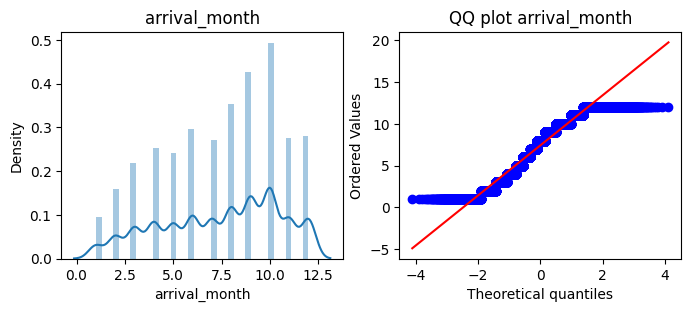

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


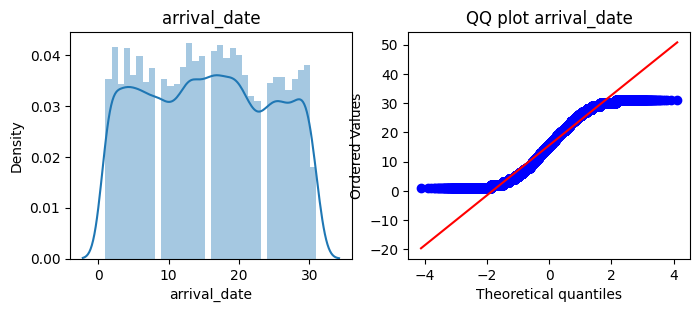

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


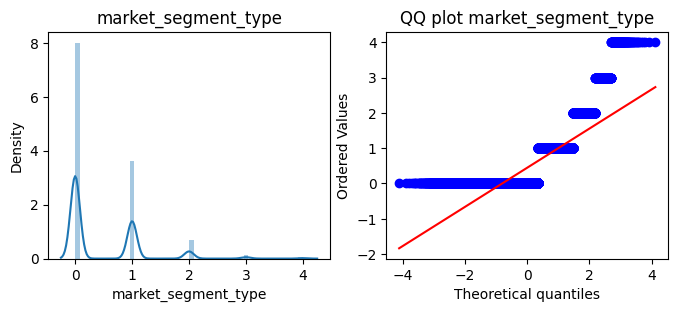

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


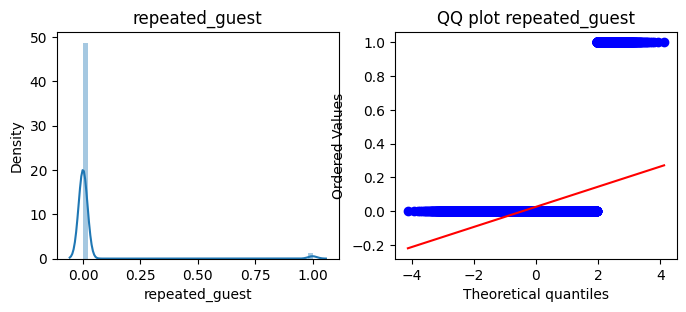

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


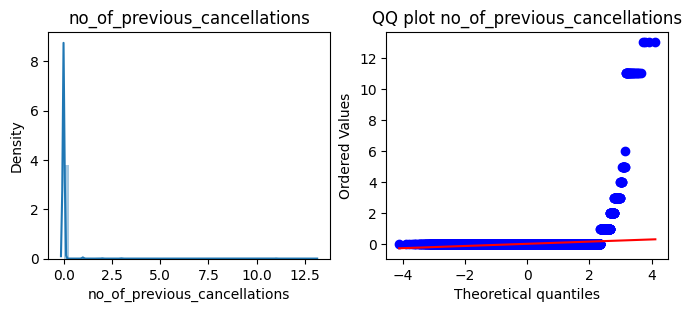

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


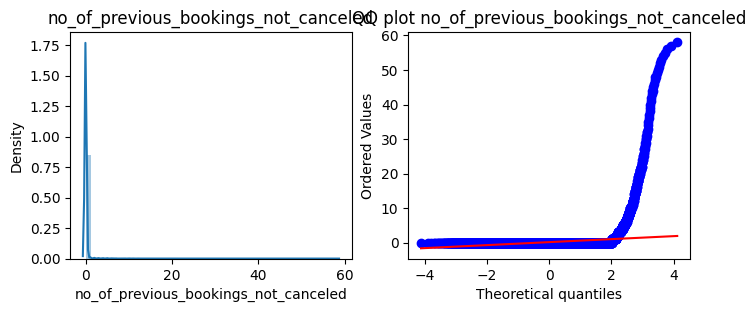

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


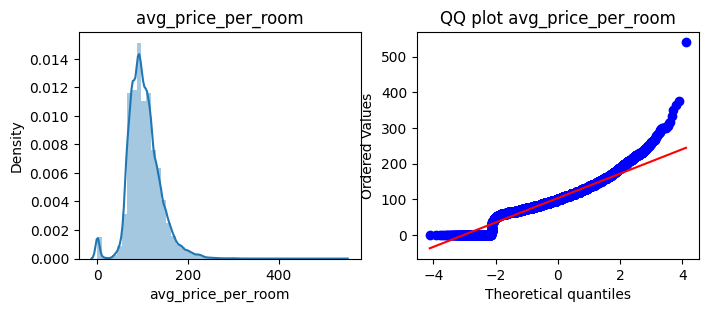

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


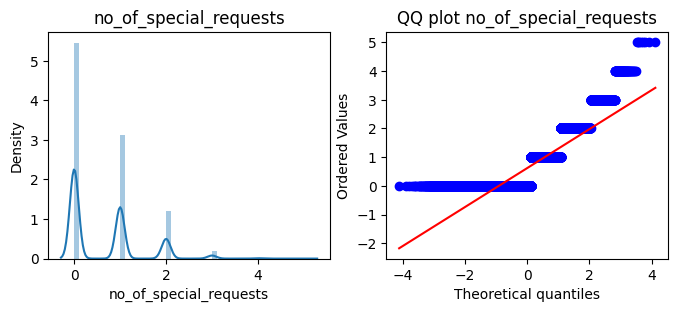

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


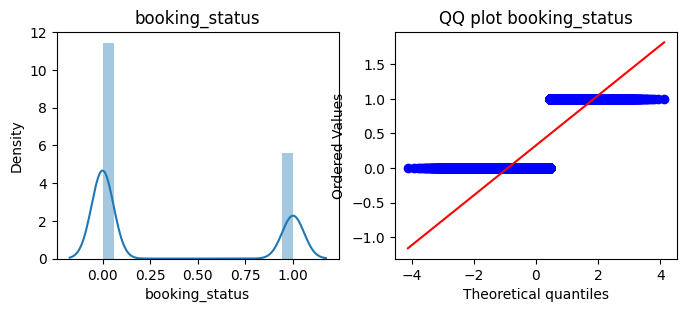

In [ ]:
# ## **Handling Numerical Variables**

# In[24]:


### Plotting distribution graph and QQ-Plot
for i in range(len(df.columns)):
  plt.figure(figsize=(8,3),dpi=100)
  plt.subplot(121)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.subplot(122)
  stats.probplot(df[df.columns[i]], dist="norm", plot=plt)
  plt.title('QQ plot '+df.columns[i])

  plt.show()

In [17]:
# ### **Detecting Outliers and Removal using Z-score (Capping Method)**

# In[25]:


### Appending upper and lower limit for all columns
upper_limit = []
lower_limit = []
for i in range(len(df.columns)):
  upper_limit.append(df[df.columns[i]].mean() + 3*df[df.columns[i]].std())
  lower_limit.append(df[df.columns[i]].mean() - 3*df[df.columns[i]].std())


In [18]:
### Replacing all limit values to their relative columns
for i in range(len(df.columns)):
  df[df.columns[i]] = np.where(
    df[df.columns[i]]>upper_limit[i],
    upper_limit[i],
    np.where(
        df[df.columns[i]]<lower_limit[i],
        lower_limit[i],
        df[df.columns[i]]
    )
)

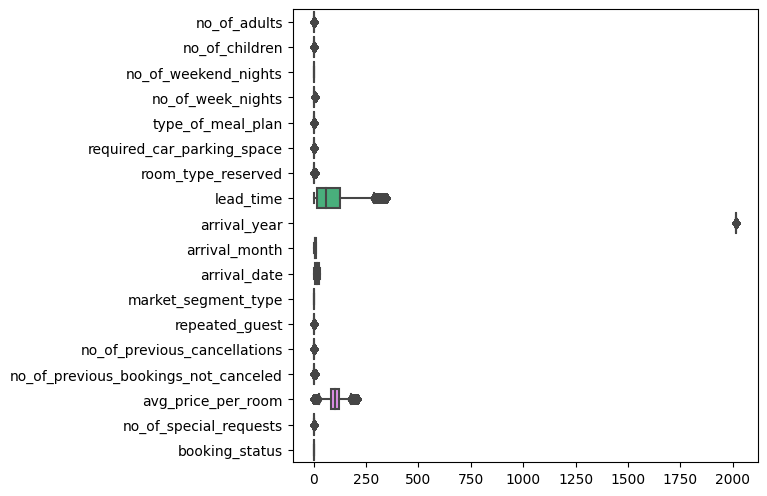

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

In [19]:
X = df.drop('booking_status',axis=1)
Y = df['booking_status']

In [20]:
# ## **Splitting X,Y into training and testing sets**

# In[29]:


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=101)

X_train.shape, X_test.shape

((25392, 17), (10883, 17))

In [21]:
# ## **Feature Scaling**

# In[30]:


scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Mean of all columns
scaler.mean_

array([1.84774754e+00, 8.43445243e-02, 8.03227940e-01, 2.18632650e+00,
       5.16461878e-01, 1.74628464e-02, 7.06634091e-01, 8.49564539e+01,
       2.01781864e+03, 7.42922968e+00, 1.55733302e+01, 4.34732721e-01,
       1.24988841e-02, 9.37156268e-03, 7.22549658e-02, 1.03300102e+02,
       6.17992141e-01])

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0,25392.0
mean,1.8,0.1,0.8,2.2,0.5,0.0,0.7,85.0,2017.8,7.4,15.6,0.4,0.0,0.0,0.1,103.3,0.6
std,0.5,0.3,0.9,1.3,1.0,0.1,1.4,84.4,0.4,3.1,8.7,0.6,0.1,0.1,0.6,34.2,0.8
min,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,0.0,1.0,0.0,0.0,0.0,17.0,2018.0,5.0,8.0,0.0,0.0,0.0,0.0,80.3,0.0
50%,2.0,0.0,1.0,2.0,0.0,0.0,0.0,57.0,2018.0,8.0,16.0,0.0,0.0,0.0,0.0,99.4,0.0
75%,2.0,0.0,2.0,3.0,0.0,0.0,0.0,126.0,2018.0,10.0,23.0,1.0,0.0,0.0,0.0,120.2,1.0
max,3.4,1.3,3.4,6.4,3.0,0.6,4.9,343.0,2018.0,12.0,31.0,2.5,0.5,1.1,5.4,208.7,3.0


In [23]:
# ## **Model Building**

# ### LogisticRegressionCV

# In[54]:


log_model = LogisticRegressionCV(max_iter=150)
log_model.fit(X_train_scaled,y_train)

LogisticRegressionCV(max_iter=150)

In [24]:
y_pred = log_model.predict(X_test_scaled)

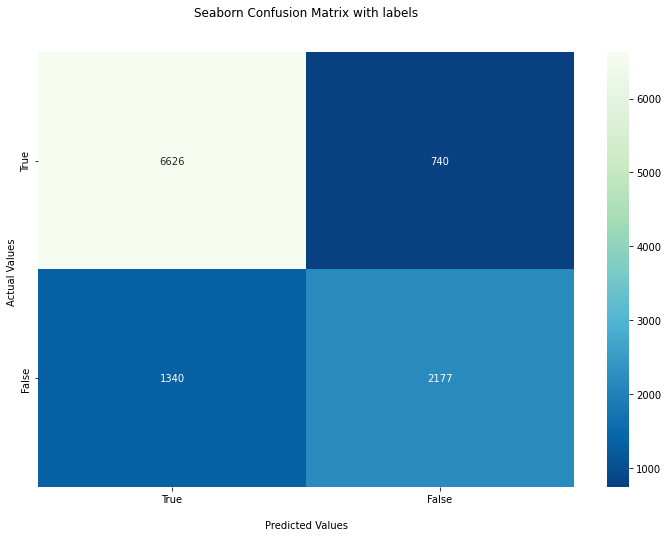

In [25]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='GnBu_r', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


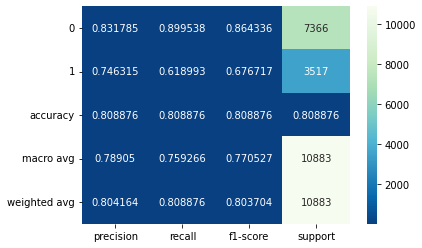

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='GnBu_r', fmt='g')

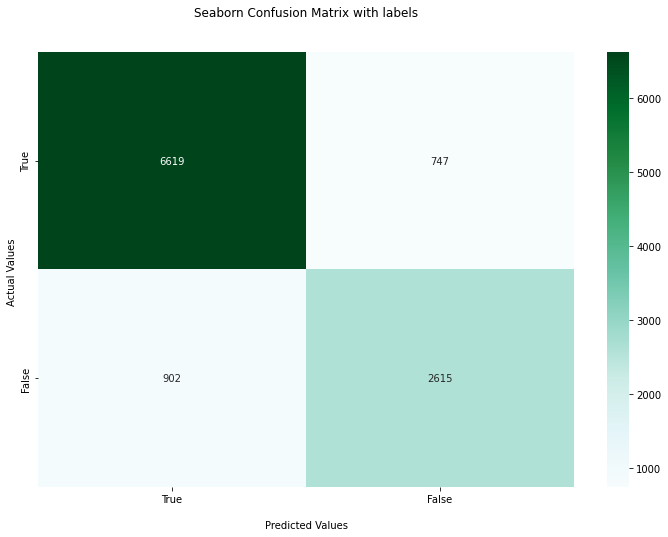

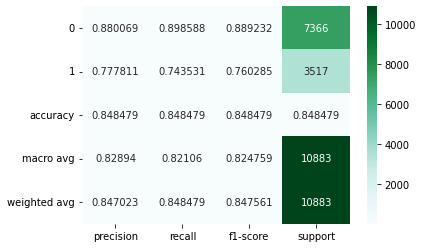

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)


# In[21]:


y_pred = knn.predict(X_test_scaled)


# - Heatmap of Confusion Matrix

# In[22]:


cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


# - Classification Report of KNN Model

# In[23]:


clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BuGn', fmt='g')


In [18]:
# ## Support Vector Machines

# In[24]:


# an initial SVM model with linear kernel   
svm_linear = SVC(kernel='linear')

# fit
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [19]:
y_pred = svm_linear.predict(X_test_scaled)

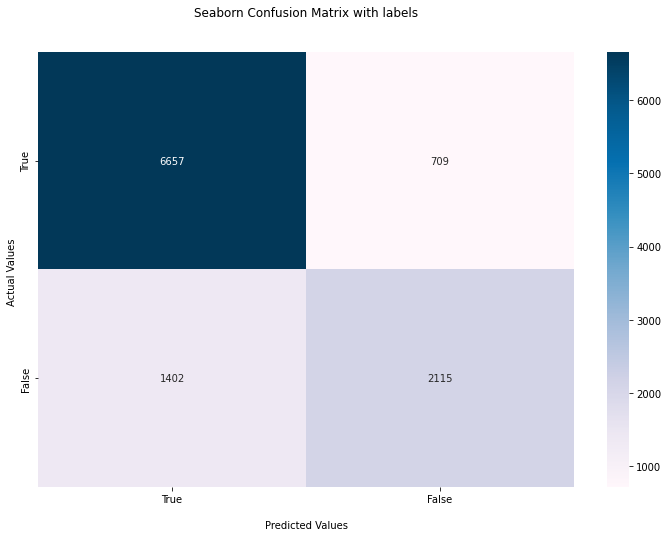

In [20]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

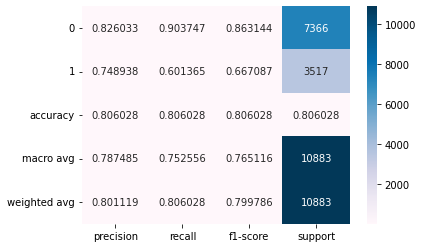

In [21]:
# - Classification Report of SVM Model

# In[27]:


clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuBu', fmt='g')

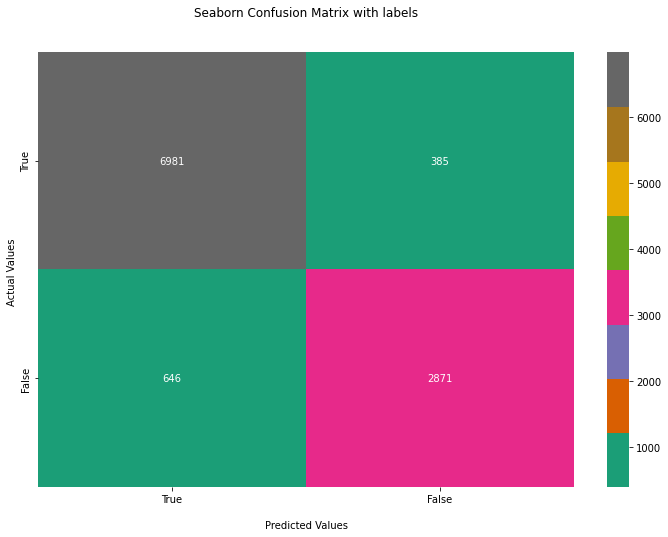

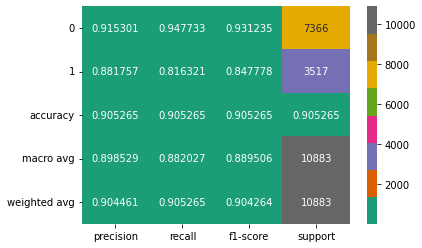

In [42]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)


# In[29]:


y_pred = RF.predict(X_test_scaled)


# - Heatmap of Confusion Matrix

# In[30]:


cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


# - Classification Report of Random Forest

# In[31]:


clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='Dark2', fmt='g')


[0.8432181589254869, 0.8394766213990875, 0.8353805360781262, 0.8321119822113611, 0.8317968665200819, 0.8295124870911419, 0.8292763906677874]


Text(0, 0.5, 'Error Rate')

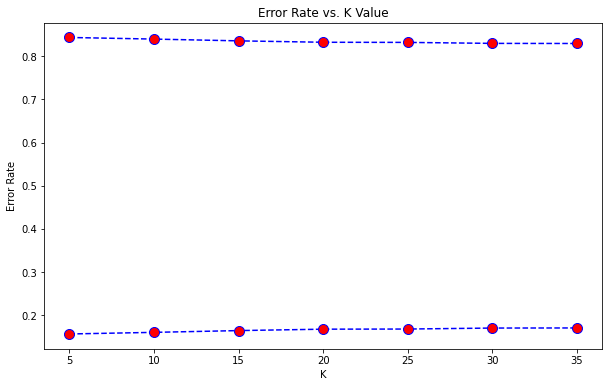

In [25]:

# - Hyper-Parameter Tuning with KNN

# In[18]:


accuracy_rate = []

# Will take some time
for i in range(5,40,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_scaled,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

error_rate = []

# Will take some time
for i in range(5,40,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_scaled,y_train,cv=10)
    error_rate.append(1-score.mean())


# In[19]:


plt.figure(figsize=(10,6))

plt.plot(range(5,40,5),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(5,40,5),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

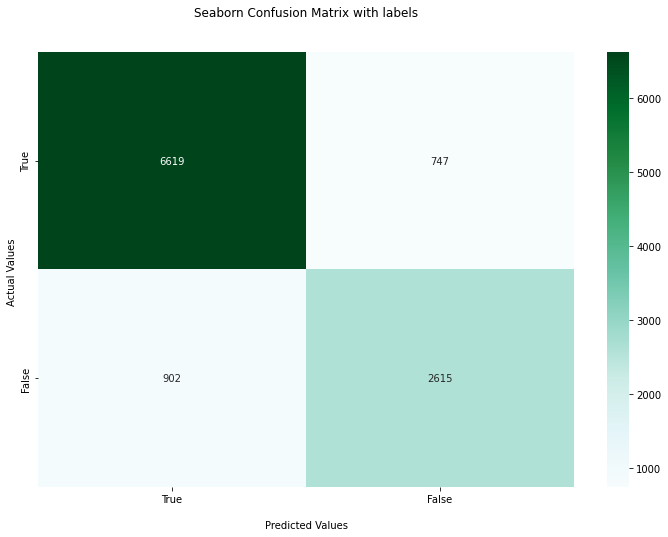

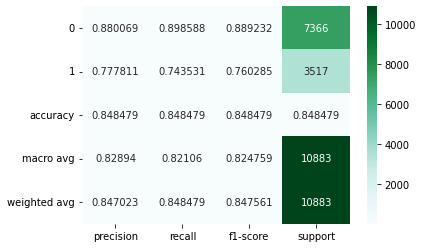

In [26]:
best_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
best_knn.fit(X_train_scaled,y_train)


# In[21]:


y_pred=best_knn.predict(X_test_scaled)


# In[22]:


cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


# In[23]:


clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BuGn', fmt='g')


In [28]:
# - Hyper-Parameter Tuning with Random Forest

# In[33]:


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(3,20,5),
    'min_samples_leaf': range(20,500,50),
    'min_samples_split': [50,100,200,500],
    'n_estimators': [30,60,90,120]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='accuracy',return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)


# In[34]:


# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)


# In[35]:


# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
We can get accuracy of 0.8632640201638312 using {'max_depth': 13, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 60}


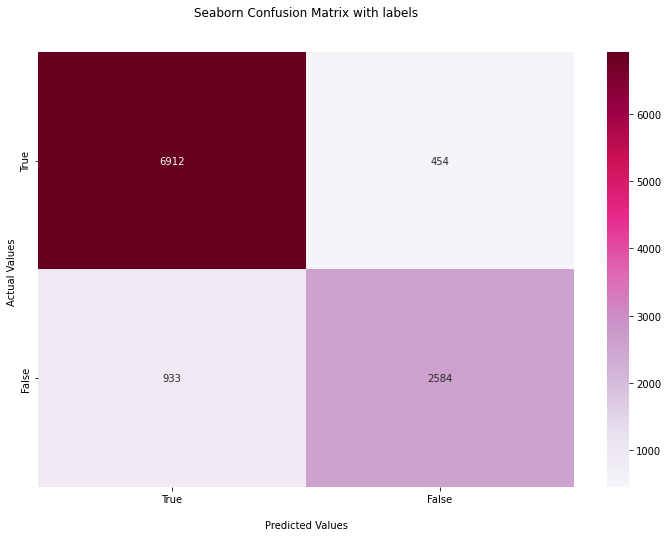

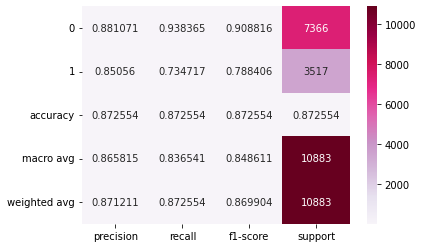

In [13]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
best_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=13,
                             min_samples_leaf=20, 
                             min_samples_split=50,
                             n_estimators=60)


# In[37]:


# fit
best_rfc.fit(X_train_scaled,y_train)


# In[38]:


y_pred = best_rfc.predict(X_test_scaled)


# In[39]:


cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


# In[40]:


clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuRd', fmt='g')


In [14]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'Cs': [1,2,3,4,5,6,7,8,9,10,12],
    'cv' : [5,8],
    'penalty': ['l2'],
    'solver' : [ 'newton-cg'] }
# Create a based model
lr = LogisticRegressionCV(max_iter=500)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid,scoring='accuracy',return_train_score=True,
                         n_jobs = -1,verbose = 1)


# In[42]:


# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)


# In[43]:


# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
We can get accuracy of 0.8039537419833971 using {'Cs': 5, 'cv': 5, 'penalty': 'l2', 'solver': 'newton-cg'}


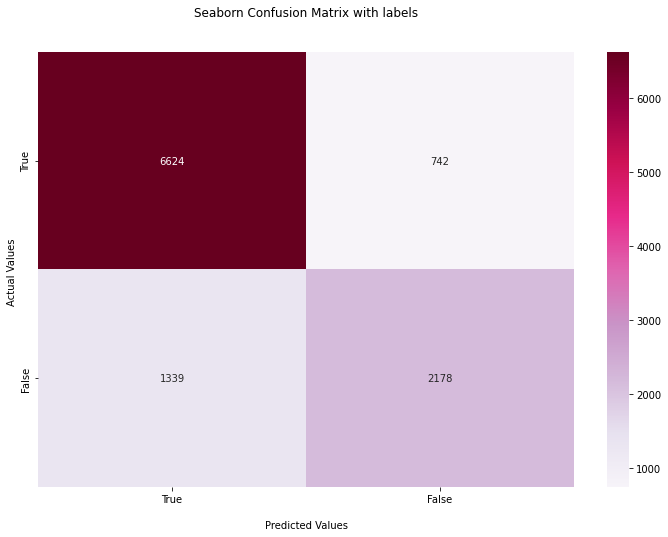

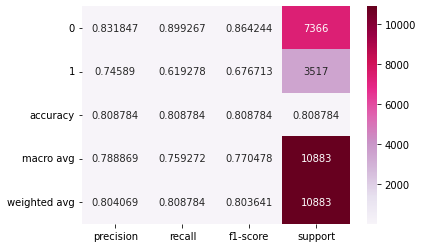

In [20]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
best_lr = LogisticRegressionCV(Cs=5,cv=5,max_iter=150,solver='newton-cg')

# fit
best_lr.fit(X_train_scaled,y_train)

y_pred = best_lr.predict(X_test_scaled)


# In[45]:


cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


# In[46]:


clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuRd', fmt='g')



In [21]:
# Hyper-Parameter Tuning with SVM

# In[24]:


parameters = {'C':[0.01,0.1,1], 
              'kernel': ['linear','rbf']}

# instantiate a model 
svc_grid_search = SVC()

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True,n_jobs=-1)

# fit
clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [22]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head(3)


# In[26]:




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.344957,0.686399,2.304088,0.407960,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.808230,0.801733,0.800512,...,0.801985,0.003914,5,0.801359,0.803673,0.802845,0.803928,0.804618,0.803284,0.001117
1,30.069512,2.069423,7.727650,1.377425,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.775743,0.773774,0.775896,...,0.777489,0.003387,6,0.775562,0.778319,0.778773,0.777444,0.778970,0.777814,0.001242
2,18.775970,0.869129,2.268946,0.439415,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.808821,0.802126,0.803466,...,0.803127,0.003262,4,0.802885,0.804608,0.803731,0.803928,0.805454,0.804121,0.000864


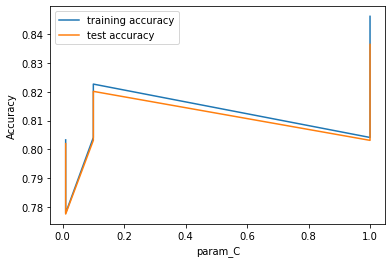

In [23]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_C"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_C"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
clf.best_params_,clf.best_score_

({'C': 1, 'kernel': 'rbf'}, 0.8365229375861389)

In [25]:
best_SVM = SVC(C=1,gamma=0.01,kernel='rbf')
best_SVM.fit(X_train_scaled,y_train)

SVC(C=1, gamma=0.01)

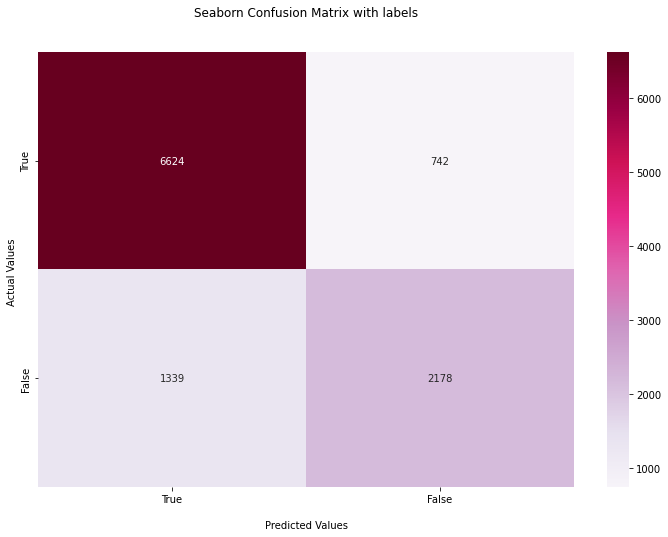

In [26]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

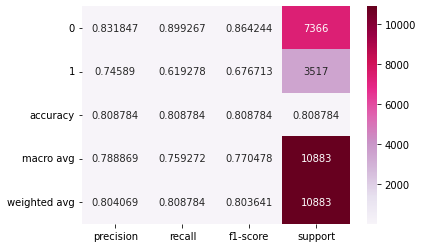

In [27]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuRd', fmt='g')

### **Artificial Neural Network**

In [49]:
# Initialising the ANN
ANN_model = Sequential()
ANN_model.add(Dense(64, activation='relu',input_dim=X_train_scaled.shape[1]))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(128, activation='relu'))
ANN_model.add(Dropout(0.6))
ANN_model.add(Dense(64, activation='relu'))
ANN_model.add(Dense(32, activation='relu'))
ANN_model.add(Dense(1, activation='sigmoid'))

ANN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                1152      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                

In [51]:
# Compiling the ANN
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
# Fitting the ANN to the Training set
history = ANN_model.fit(X_train, y_train,epochs=100,validation_data=(X_test,y_test))
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error.

Epoch 1/100
794/794 [==============================] - 4s 4ms/step - loss: 5.8379 - accuracy: 0.5652 - val_loss: 0.6233 - val_accuracy: 0.6768
Epoch 2/100
794/794 [==============================] - 3s 4ms/step - loss: 0.7562 - accuracy: 0.6071 - val_loss: 0.6249 - val_accuracy: 0.6768
Epoch 3/100
794/794 [==============================] - 3s 3ms/step - loss: 0.6912 - accuracy: 0.6280 - val_loss: 0.6823 - val_accuracy: 0.7643
Epoch 4/100
794/794 [==============================] - 3s 3ms/step - loss: 0.6577 - accuracy: 0.6441 - val_loss: 0.6086 - val_accuracy: 0.6768
Epoch 5/100
794/794 [==============================] - 2s 3ms/step - loss: 0.6166 - accuracy: 0.6738 - val_loss: 0.5619 - val_accuracy: 0.7407
Epoch 6/100
794/794 [==============================] - 3s 4ms/step - loss: 0.5664 - accuracy: 0.7222 - val_loss: 0.5357 - val_accuracy: 0.7654
Epoch 7/100
794/794 [==============================] - 3s 4ms/step - loss: 0.5450 - accuracy: 0.7428 - val_loss: 0.5331 - val_accuracy: 0.7633

In [53]:
# Predicting the Test set results
y_pred = ANN_model.predict(X_test)
y_pred = (y_pred > 0.5)

341/341 [==============================] - 1s 2ms/step


In [54]:
def plot_learning_curve(history):
    
    plt.figure(figsize=(10,6))
    
    #model accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # model loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

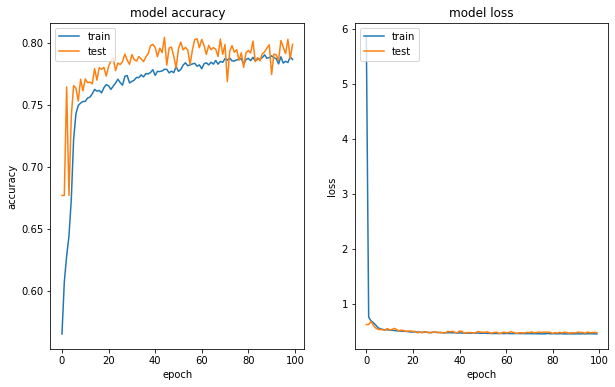

In [55]:
plot_learning_curve(history)

In [56]:
model_ls = []
for model in [RF,knn,best_SVM,log_model,ANN_model]:
  if model == ANN_model:
    model_ls.append(model.evaluate(X_test_scaled,y_test)[0])
  else:
    model_ls.append(model.score(X_test_scaled,y_test))
model_score = pd.DataFrame(model_ls,columns=['Accuracy'],index= ['Random Forest','KNearestNeighbors','Tuned_SVM','LogisticRegressionCV','Artificial Neural Network'])


# In[59]:


model_score


341/341 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.7311


,Accuracy
Random Forest,0.905265
KNearestNeighbors,0.848479
Tuned_SVM,0.819903
LogisticRegressionCV,0.808876
Artificial Neural Network,0.586408
